In [1]:
# std
import os
import sys
import re

# 3rd party
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def get_path(filename, dirname=None):
    root = os.path.dirname(os.getcwd())
    path = os.path.join(root, dirname, filename) if dirname else os.path.join(root, filename)

    return path

In [3]:
path = get_path('rntn_train_validate_and_test_freebase_cost.csv', 'results')
path

'/Users/luyolomagangane/workspace/deep-knowledge-modelling/results/rntn_train_validate_and_test_freebase_cost.csv'

In [4]:
results_cost = pd.read_csv(path)
results_cost.head()

,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_experiment,cost_validation_experiment,cost_test_experiment
0,132440.031250,11349.219727,44417.558594,688.541809,7296.789062,29179.203125
1,105532.007812,10859.009766,42546.472656,557.695801,6449.194336,26036.406250
2,91884.437500,10526.935547,41280.324219,518.046936,6148.604980,24944.660156
3,82081.164062,10277.822266,40338.945312,509.419189,5694.241699,23489.994141
4,74487.726562,10086.320312,39621.523438,463.666870,6320.826172,26412.765625


In [5]:
results_cost = results_cost.reset_index()
results_cost.head()

,index,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_experiment,cost_validation_experiment,cost_test_experiment
0,0,132440.031250,11349.219727,44417.558594,688.541809,7296.789062,29179.203125
1,1,105532.007812,10859.009766,42546.472656,557.695801,6449.194336,26036.406250
2,2,91884.437500,10526.935547,41280.324219,518.046936,6148.604980,24944.660156
3,3,82081.164062,10277.822266,40338.945312,509.419189,5694.241699,23489.994141
4,4,74487.726562,10086.320312,39621.523438,463.666870,6320.826172,26412.765625


In [6]:
results_cost = results_cost.rename(columns={'index': 'epoch'})
results_cost.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_experiment,cost_validation_experiment,cost_test_experiment
0,0,132440.031250,11349.219727,44417.558594,688.541809,7296.789062,29179.203125
1,1,105532.007812,10859.009766,42546.472656,557.695801,6449.194336,26036.406250
2,2,91884.437500,10526.935547,41280.324219,518.046936,6148.604980,24944.660156
3,3,82081.164062,10277.822266,40338.945312,509.419189,5694.241699,23489.994141
4,4,74487.726562,10086.320312,39621.523438,463.666870,6320.826172,26412.765625


In [7]:
results_cost['epoch'] += 1
results_cost.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_experiment,cost_validation_experiment,cost_test_experiment
0,1,132440.031250,11349.219727,44417.558594,688.541809,7296.789062,29179.203125
1,2,105532.007812,10859.009766,42546.472656,557.695801,6449.194336,26036.406250
2,3,91884.437500,10526.935547,41280.324219,518.046936,6148.604980,24944.660156
3,4,82081.164062,10277.822266,40338.945312,509.419189,5694.241699,23489.994141
4,5,74487.726562,10086.320312,39621.523438,463.666870,6320.826172,26412.765625


In [8]:
results_cost = results_cost.drop(['cost_test_baseline', 'cost_test_experiment'], axis=1)
results_cost.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_training_experiment,cost_validation_experiment
0,1,132440.031250,11349.219727,688.541809,7296.789062
1,2,105532.007812,10859.009766,557.695801,6449.194336
2,3,91884.437500,10526.935547,518.046936,6148.604980
3,4,82081.164062,10277.822266,509.419189,5694.241699
4,5,74487.726562,10086.320312,463.666870,6320.826172


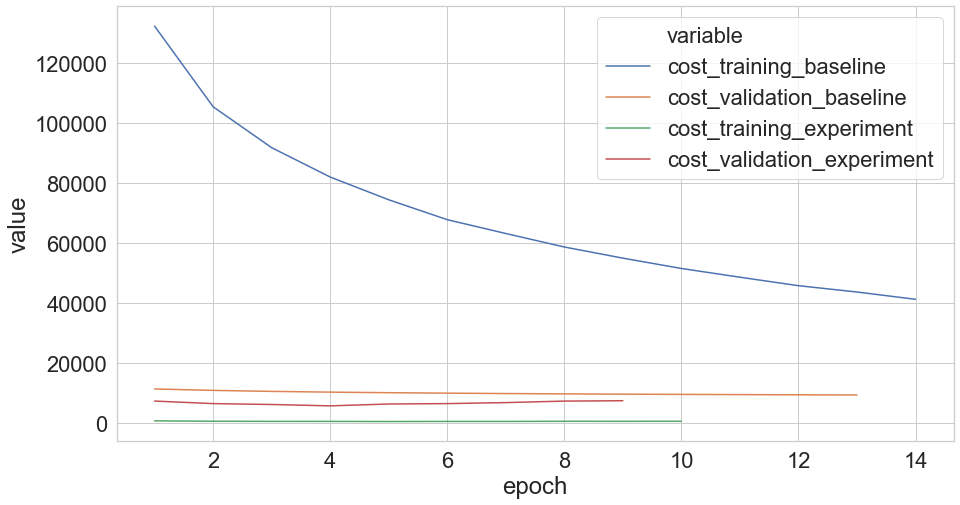

In [10]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost, ['epoch']))
plt.savefig('Freebase_Cost_Results.png', bbox_inches = "tight", format='PNG')

In [12]:
path = get_path('rntn_train_validate_and_test_freebase_accuracy.csv', 'results')
path

'/Users/luyolomagangane/workspace/deep-knowledge-modelling/results/rntn_train_validate_and_test_freebase_accuracy.csv'

In [13]:
results_accuracy = pd.read_csv(path)
results_accuracy.head()

,accuracy_training_baseline,accuracy_validation_baseline,accuracy_test_baseline,accuracy_training_experiment,accuracy_validation_experiment,accuracy_test_experiment
0,0.5779,0.505837,0.499073,0.964217,0.544070,0.542657
1,0.6274,0.512942,0.506614,0.968228,0.542548,0.541119
2,0.6627,0.518863,0.511712,0.970475,0.535104,0.536695
3,0.6933,0.523938,0.515736,0.971277,0.535950,0.540340
4,0.7168,0.527407,0.519064,0.969833,0.543478,0.546175


In [14]:
results_accuracy = results_accuracy.reset_index()
results_accuracy.head()

,index,accuracy_training_baseline,accuracy_validation_baseline,accuracy_test_baseline,accuracy_training_experiment,accuracy_validation_experiment,accuracy_test_experiment
0,0,0.5779,0.505837,0.499073,0.964217,0.544070,0.542657
1,1,0.6274,0.512942,0.506614,0.968228,0.542548,0.541119
2,2,0.6627,0.518863,0.511712,0.970475,0.535104,0.536695
3,3,0.6933,0.523938,0.515736,0.971277,0.535950,0.540340
4,4,0.7168,0.527407,0.519064,0.969833,0.543478,0.546175


In [15]:
results_accuracy = results_accuracy.rename(columns={'index': 'epoch'})
results_accuracy.head()

,epoch,accuracy_training_baseline,accuracy_validation_baseline,accuracy_test_baseline,accuracy_training_experiment,accuracy_validation_experiment,accuracy_test_experiment
0,0,0.5779,0.505837,0.499073,0.964217,0.544070,0.542657
1,1,0.6274,0.512942,0.506614,0.968228,0.542548,0.541119
2,2,0.6627,0.518863,0.511712,0.970475,0.535104,0.536695
3,3,0.6933,0.523938,0.515736,0.971277,0.535950,0.540340
4,4,0.7168,0.527407,0.519064,0.969833,0.543478,0.546175


In [16]:
results_accuracy['epoch'] += 1
results_accuracy.head()

,epoch,accuracy_training_baseline,accuracy_validation_baseline,accuracy_test_baseline,accuracy_training_experiment,accuracy_validation_experiment,accuracy_test_experiment
0,1,0.5779,0.505837,0.499073,0.964217,0.544070,0.542657
1,2,0.6274,0.512942,0.506614,0.968228,0.542548,0.541119
2,3,0.6627,0.518863,0.511712,0.970475,0.535104,0.536695
3,4,0.6933,0.523938,0.515736,0.971277,0.535950,0.540340
4,5,0.7168,0.527407,0.519064,0.969833,0.543478,0.546175


In [17]:
results_accuracy_test = results_accuracy[['accuracy_test_baseline', 'accuracy_test_experiment']]
results_accuracy_test.head()

,accuracy_test_baseline,accuracy_test_experiment
0,0.499073,0.542657
1,0.506614,0.541119
2,0.511712,0.536695
3,0.515736,0.540340
4,0.519064,0.546175


In [18]:
results_accuracy_test.max()

accuracy_test_baseline      0.535768
accuracy_test_experiment    0.547902
dtype: float64

In [19]:
results_accuracy = results_accuracy.drop(['accuracy_test_baseline', 'accuracy_test_experiment'], axis=1)
results_accuracy.head()

,epoch,accuracy_training_baseline,accuracy_validation_baseline,accuracy_training_experiment,accuracy_validation_experiment
0,1,0.5779,0.505837,0.964217,0.544070
1,2,0.6274,0.512942,0.968228,0.542548
2,3,0.6627,0.518863,0.970475,0.535104
3,4,0.6933,0.523938,0.971277,0.535950
4,5,0.7168,0.527407,0.969833,0.543478


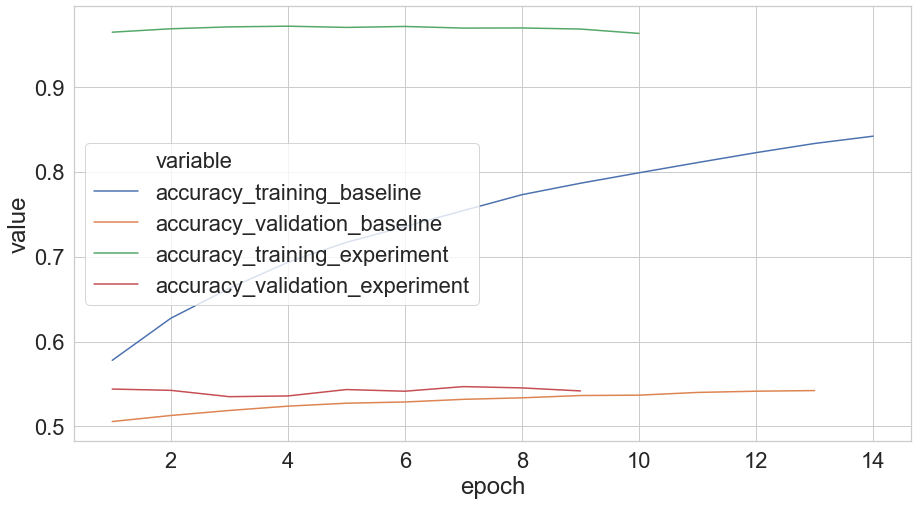

In [20]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_accuracy, ['epoch']))
plt.savefig('Freebase_Accuracy_Results.png', bbox_inches = "tight", format='PNG')

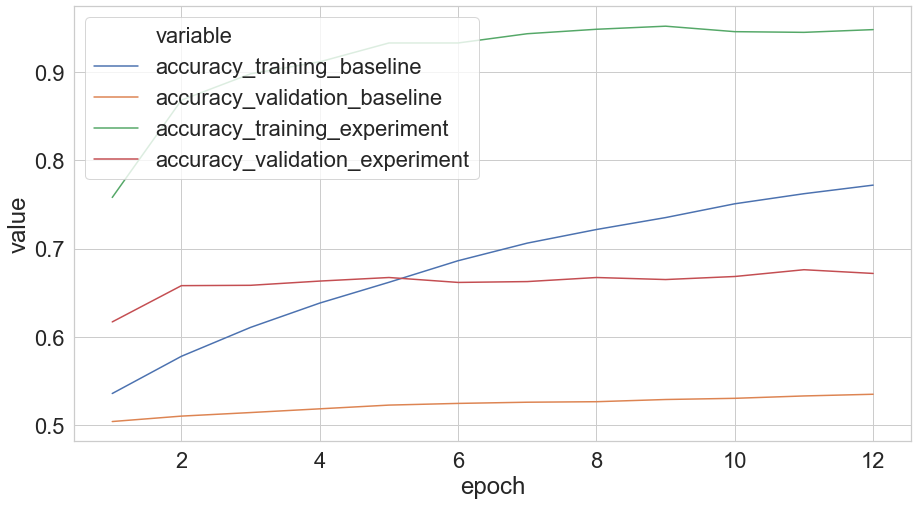

In [21]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_accuracy[:12], ['epoch']))
plt.savefig('Freebase_Accuracy_Results_Early_Stopping.png', bbox_inches = "tight", format='PNG')